# Data Preprocessing 

## Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing dataset 

In [16]:

dataset = pd.read_csv("Data.csv")
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,3].values
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## taking care of missing data 

In [17]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:,1:3])

X[:,1:3] = imputer.transform(X[:,1:3])

print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## categorical data

In [24]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le_X = LabelEncoder()                 # it will give 0,1,2 (for france,spain,germany)
X[:,0] = le_X.fit_transform(X[:,0])   # firstly fit the labelencoder then transform orginal arrrarX[:,0]


from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('state', OneHotEncoder(), [0])], remainder = "passthrough")  # to create dummy varible,using this we will get new 3 column for france, spain ,germany
X = ct.fit_transform(X)




le_y = LabelEncoder()
y = le_y.fit_transform(Y)    # there is no need of  dummy var. for Y,cause there are 2 types of var. yes(1),no(0),

print(X)
print(y)

[[0.0 1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 0.0 48.0 79000.0]
 [1.0 0.0 1.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 0.0 37.0 67000.0]]
[0 1 0 0 1 1 0 1 0 1]


# splitting data

In [25]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

## feature scaling  

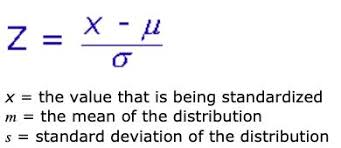

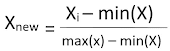

In [26]:
# using Standard Scaler (standardization)

"""if the feature are not in same scale then we applied feature scaling
most of algo. use euclidean distance to find computation b/w the two  points
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train)
X_test  = sc.transform(X_test)
print(X_test)



[[ 1.         -1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [-1.          1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [ 1.         -1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [ 1.         -1.         -0.37796447  1.29099445  0.05261351 -1.11141978]
 [-1.          1.         -0.37796447 -0.77459667  1.64058505  1.7202972 ]
 [ 1.         -1.         -0.37796447  1.29099445 -0.0813118  -0.16751412]
 [-1.          1.         -0.37796447 -0.77459667  0.95182631  0.98614835]
 [-1.          1.         -0.37796447 -0.77459667 -0.59788085 -0.48214934]]
[[ 1.         -1.          2.64575131 -0.77459667 -1.45882927 -0.90166297]
 [ 1.         -1.          2.64575131 -0.77459667  1.98496442  2.13981082]]


In [27]:
# using MinMaxScaler (normalization)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
y_train = mms.fit_transform(X_test)